In [1]:
pip install pyopenms

Note: you may need to restart the kernel to use updated packages.


In [15]:
from pyopenms import *
seq = AASequence.fromString("DFPIANGER") # create AASequence object from string representation
prefix = seq.getPrefix(4) # extract prefix of length 4
suffix = seq.getSuffix(5) # extract suffix of length 5
concat = seq + seq # concatenate two sequences

# print string representation of sequences
print("Sequence:", seq)
print("Prefix:", prefix)
print("Suffix:", suffix)
print("Concatenated:", concat)

# some mass calculations
mfull = seq.getMonoWeight() # weight of M
mprecursor = seq.getMonoWeight(Residue.ResidueType.Full, 2) # weight of M+2H

# we can calculate mass-over-charge manually
mz = seq.getMonoWeight(Residue.ResidueType.Full, 2) / 2.0 # m/z of [M+2H]2+
# or simply by:
mz = seq.getMZ(2) # same as above

print()
print("Monoisotopic mass of peptide [M] is", mfull)
print("Monoisotopic mass of peptide precursor [M+2H]2+ is", mprecursor)
print("Monoisotopic m/z of [M+2H]2+ is", mz)

Sequence: DFPIANGER
Prefix: DFPI
Suffix: ANGER
Concatenated: DFPIANGERDFPIANGER

Monoisotopic mass of peptide [M] is 1017.4879641373001
Monoisotopic mass of peptide precursor [M+2H]2+ is 1019.5025170708421
Monoisotopic m/z of [M+2H]2+ is 509.7512585354211


In [3]:
seq = AASequence.fromString("DFPIANGER")

print("The peptide", str(seq), "consists of the following amino acids:")
for aa in seq:
    print(aa.getName(), ":", aa.getMonoWeight())

The peptide DFPIANGER consists of the following amino acids:
Aspartate : 133.0375092233
Phenylalanine : 165.0789793509
Proline : 115.0633292871
Isoleucine : 131.0946294147
Alanine : 89.04767922330001
Asparagine : 132.0534932552
Glycine : 75.0320291595
Glutamate : 147.05315928710002
Arginine : 174.1116764466


In [4]:
seq = AASequence.fromString("C[143]PKCK(Label:13C(6)15N(2))CR")

# check if AASequence has a N- or C-terminal modification
if seq.hasNTerminalModification():
    print("N-Term Modification: ", seq.getNTerminalModification().getFullId())
if seq.hasCTerminalModification():
    print("C-Term Modification: ", seq.getCTerminalModification().getFullId())
# iterate over all residues and look for modifications
for aa in seq:
    if (aa.isModified()):
        print(aa.getName(), ":", aa.getMonoWeight(), ":", aa.getModificationName())
    else:
        print(aa.getName(), ":", aa.getMonoWeight())

N-Term Modification:  Pyro-carbamidomethyl (N-term C)
Cysteine : 121.0197499533
Proline : 115.0633292871
Lysine : 146.1055284466
Cysteine : 121.0197499533
Lysine : 154.1197284466 : Label:13C(6)15N(2)
Cysteine : 121.0197499533
Arginine : 174.1116764466


In [5]:
seq = AASequence.fromString("DFPIANGER")
seq_formula = seq.getFormula()
print("Peptide", seq, "has molecular formula", seq_formula)

Peptide DFPIANGER has molecular formula C44H67N13O15


In [6]:
# print coarse isotope distribution
coarse_isotopes = seq_formula.getIsotopeDistribution( CoarseIsotopePatternGenerator(6) )
for iso in coarse_isotopes.getContainer():
    print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")

Isotope 1017.4879641373 has abundance 56.8165123462677 %
Isotope 1018.4913189751 has abundance 30.52913248538971 %
Isotope 1019.4946738128999 has abundance 9.802103787660599 %
Isotope 1020.4980286507 has abundance 2.3292064666748047 %
Isotope 1021.5013834885 has abundance 0.4492596257477999 %
Isotope 1022.5047383263 has abundance 0.07378292502835393 %


In [7]:
# print fine structure of isotope distribution
fine_isotopes = seq_formula.getIsotopeDistribution( FineIsotopePatternGenerator(0.01) ) # max 0.01 unexplained probability
for iso in fine_isotopes.getContainer():
    print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")

Isotope 1017.4879641373001 has abundance 56.80969953536987 %
Isotope 1018.4849991373001 has abundance 2.7278145775198936 %
Isotope 1018.4913191373001 has abundance 27.035287022590637 %
Isotope 1018.4921811373001 has abundance 0.3246041014790535 %
Isotope 1018.4942408854 has abundance 0.4377691075205803 %
Isotope 1019.4883541373001 has abundance 1.2981452979147434 %
Isotope 1019.4922181373001 has abundance 1.7511537298560143 %
Isotope 1019.4946741373 has abundance 6.286735832691193 %
Isotope 1019.4975958854001 has abundance 0.2083308296278119 %
Isotope 1020.4917091373001 has abundance 0.3018683288246393 %
Isotope 1020.4955731373002 has abundance 0.833360105752945 %
Isotope 1020.4980291373 has abundance 0.9519387967884541 %
Isotope 1021.4989281373 has abundance 0.1937880413606763 %


In [8]:
import math
from matplotlib import pyplot as plt

def plotIsotopeDistribution(isotope_distribution, title="Isotope distribution"):
    plt.title(title)
    distribution = {"mass": [], "abundance": []}
    for iso in isotope_distribution.getContainer():
        distribution["mass"].append(iso.getMZ())
        distribution["abundance"].append(iso.getIntensity() * 100)

    bars = plt.bar(distribution["mass"], distribution["abundance"], width=0.01, snap=False) # snap ensures that all bars are rendered

    plt.ylim([0, 110])
    plt.xticks(range(math.ceil(distribution["mass"][0]) - 2,
                     math.ceil(distribution["mass"][-1]) + 2))
    plt.xlabel("Atomic mass (u)")
    plt.ylabel("Relative abundance (%)")

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plotIsotopeDistribution(coarse_isotopes, "Isotope distribution - coarse")
plt.subplot(1,2,2)
plotIsotopeDistribution(fine_isotopes, "Isotope distribution - fine structure")
plt.show()

<Figure size 1000x700 with 2 Axes>

In [9]:
suffix = seq.getSuffix(3) # y3 ion "GER"
print("="*35)
print("y3 ion sequence:", suffix)
y3_formula = suffix.getFormula(Residue.ResidueType.YIon, 2) # y3++ ion
suffix.getMonoWeight(Residue.ResidueType.YIon, 2) / 2.0 # CORRECT
suffix.getMonoWeight(Residue.ResidueType.XIon, 2) / 2.0 # CORRECT
suffix.getMonoWeight(Residue.ResidueType.BIon, 2) / 2.0 # INCORRECT

print("y3 mz:", suffix.getMonoWeight(Residue.ResidueType.YIon, 2) / 2.0 )
print("y3 molecular formula:", y3_formula)

y3 ion sequence: GER
y3 mz: 181.09514384957103
y3 molecular formula: C13H24N6O6


In [17]:

seq = AASequence.fromString("PEPTIDESEKUEM(Oxidation)CER")
print(seq.toUnmodifiedString())
print(seq.toString())
print(seq.toUniModString())
print(seq.toBracketString())
print(seq.toBracketString(False))

print(AASequence.fromString("DFPIAM(UniMod:35)GER"))
print(AASequence.fromString("DFPIAM[+16]GER"))
print(AASequence.fromString("DFPIAM[+15.99]GER"))
print(AASequence.fromString("DFPIAM[147]GER"))
print(AASequence.fromString("DFPIAM[147.035405]GER"))

PEPTIDESEKUEMCER
PEPTIDESEKUEM(Oxidation)CER
PEPTIDESEKUEM(UniMod:35)CER
PEPTIDESEKUEM[147]CER
PEPTIDESEKUEM[147.03540001709996]CER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER


In [18]:
 s = AASequence.fromString(".(Dimethyl)DFPIAMGER.")
print(s, s.hasNTerminalModification())
s = AASequence.fromString(".DFPIAMGER.(Label:18O(2))")
print(s, s.hasCTerminalModification())
s = AASequence.fromString(".DFPIAMGER(Phospho).")
print(s, s.hasCTerminalModification())

.(Dimethyl)DFPIAMGER True
DFPIAMGER.(Label:18O(2)) True
DFPIAMGER(Phospho) False


In [26]:
bsa = FASTAEntry() # one entry in a FASTA file
bsa.sequence = "MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGE"
bsa.description = "BSA Bovine Albumin (partial sequence)"
bsa.identifier = "BSA"
alb = FASTAEntry()
alb.sequence = "MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGE"
alb.description = "ALB Human Albumin (partial sequence)"
alb.identifier = "ALB"
entries = [bsa, alb]
f = FASTAFile()
f.store("example.fasta", entries)
entries = []
f = FASTAFile()
f.load("example.fasta", entries)
print( len(entries) )
for e in entries:
    print (e.identifier, e.sequence)

2
BSA MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGE
ALB MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGE


In [27]:
 import pyopenms
help(pyopenms.Constants)
print ("Avogadro's number is", pyopenms.Constants.AVOGADRO)

Help on module pyopenms.Constants in pyopenms:

NAME
    pyopenms.Constants

DESCRIPTION
    # @brief Mathematical and physical constants namespace.
    # 
    # This namespace contains definitions for some basic mathematical and physical constants.
    # All constants are double precision.

DATA
    AVOGADRO = 6.0221367e+23
    BOHR_RADIUS = 5.29177249e-11
    BOLTZMANN = 1.380657e-23
    C13C12_MASSDIFF_U = 1.0033548378
    CAL_PER_JOULE = 0.2390057361376673
    DEG_PER_RAD = 57.29577951308232
    E = 2.718281828459045
    ELECTRON_MASS = 9.1093897e-31
    ELECTRON_MASS_U = 0.0005485799042984105
    ELEMENTARY_CHARGE = 1.60217738e-19
    EPSILON = 1e-06
    F = 96485.31200007845
    FARADAY = 96485.31200007845
    FINE_STRUCTURE_CONSTANT = 0.00729735
    FRAGMENT_ANNOTATION_USERPARAM = 'fragment_annotation'
    GAS_CONSTANT = 8.314505189811898
    GRAVITATIONAL_CONSTANT = 6.67259e-11
    JOULE_PER_CAL = 4.184
    MM_PER_INCH = 25.4
    MOL = 6.0221367e+23
    M_PER_FOOT = 3.048
    N

In [28]:
from pyopenms import *
edb = ElementDB()

edb.hasElement("O")
edb.hasElement("S")

oxygen = edb.getElement("O")
print(oxygen.getName())
print(oxygen.getSymbol())
print(oxygen.getMonoWeight())
print(oxygen.getAverageWeight())

sulfur = edb.getElement("S")
print(sulfur.getName())
print(sulfur.getSymbol())
print(sulfur.getMonoWeight())
print(sulfur.getAverageWeight())
isotopes = sulfur.getIsotopeDistribution()

print ("One mole of oxygen weighs", 2*oxygen.getAverageWeight(), "grams")
print ("One mole of 16O2 weighs", 2*oxygen.getMonoWeight(), "grams")

Oxygen
O
15.994915
15.999405323160001
Sulfur
S
31.97207073
32.066084735289
One mole of oxygen weighs 31.998810646320003 grams
One mole of 16O2 weighs 31.98983 grams


In [29]:
edb = ElementDB()
oxygen_isoDist = {"mass": [], "abundance": []}
sulfur_isoDist = {"mass": [], "abundance": []}

oxygen = edb.getElement("O")
isotopes = oxygen.getIsotopeDistribution()
for iso in isotopes.getContainer():
    print ("Oxygen isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    oxygen_isoDist["mass"].append(iso.getMZ())
    oxygen_isoDist["abundance"].append((iso.getIntensity() * 100))

sulfur = edb.getElement("S")
isotopes = sulfur.getIsotopeDistribution()
for iso in isotopes.getContainer():
    print ("Sulfur isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    sulfur_isoDist["mass"].append(iso.getMZ())
    sulfur_isoDist["abundance"].append((iso.getIntensity() * 100))

Oxygen isotope 15.994915 has abundance 99.75699782371521 %
Oxygen isotope 16.999132 has abundance 0.03800000122282654 %
Oxygen isotope 17.999169 has abundance 0.20500000100582838 %
Sulfur isotope 31.97207073 has abundance 94.92999911308289 %
Sulfur isotope 32.971458 has abundance 0.7600000128149986 %
Sulfur isotope 33.967867 has abundance 4.2899999767541885 %
Sulfur isotope 35.967081 has abundance 0.019999999494757503 %


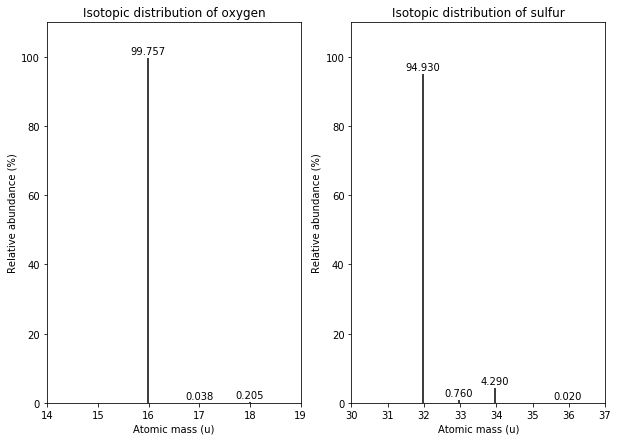

In [30]:
import math
from matplotlib import pyplot as plt

# very simple overlappping correction of annotations
def adjustText(x1, y1, x2, y2):
    if y1 > y2:
        plt.annotate('%0.3f' % (y2), xy=(x2, y2), xytext=(x2+0.5,y2+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')
    else:
        plt.annotate('%0.3f' % (y1), xy=(x1, y1), xytext=(x1+0.5,y1+9),
                     textcoords='data',
                     arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
                     horizontalalignment='right', verticalalignment='top')


def plotDistribution(distribution):
    n = len(distribution["mass"])
    for i in range(0, n):
        plt.vlines(x=distribution["mass"][i], ymin=0, ymax=distribution["abundance"][i])
        if int(distribution["mass"][i - 1]) == int(distribution["mass"][i]) \
                and i != 0:
            adjustText(distribution["mass"][i - 1], distribution["abundance"][i - 1],
                       distribution["mass"][i], distribution["abundance"][i])
        else:
            plt.text(x=distribution["mass"][i],
                     y=(distribution["abundance"][i] + 2),
                     s='%0.3f' % (distribution["abundance"][i]), va='center',
                     ha='center')
    plt.ylim([0, 110])
    plt.xticks(range(math.ceil(distribution["mass"][0]) - 2,
                     math.ceil(distribution["mass"][-1]) + 2))


plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.title("Isotopic distribution of oxygen")
plotDistribution(oxygen_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.subplot(1,2,2)
plt.title("Isotopic distribution of sulfur")
plotDistribution(sulfur_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.show()

In [31]:
edb = ElementDB()
isotopes = edb.getElement("C").getIsotopeDistribution().getContainer()
carbon_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()
isotopes = edb.getElement("N").getIsotopeDistribution().getContainer()
nitrogen_isotope_difference = isotopes[1].getMZ() - isotopes[0].getMZ()

print ("Mass difference between 12C and 13C:", carbon_isotope_difference)
print ("Mass difference between 14N and N15:", nitrogen_isotope_difference)
print ("Relative deviation:", 100*(carbon_isotope_difference -
        nitrogen_isotope_difference)/carbon_isotope_difference, "%")

Mass difference between 12C and 13C: 1.0033550000000009
Mass difference between 14N and N15: 0.9970350000000003
Relative deviation: 0.6298867300208343 %


In [32]:
from pyopenms.Constants import *

helium = ElementDB().getElement("He")
isotopes = helium.getIsotopeDistribution()

mass_sum = 2*PROTON_MASS_U + 2*ELECTRON_MASS_U + 2*NEUTRON_MASS_U
helium4 = isotopes.getContainer()[1].getMZ()
print ("Sum of masses of 2 protons, neutrons and electrons:", mass_sum)
print ("Mass of He4:", helium4)
print ("Difference between the two masses:", 100*(mass_sum - helium4)/mass_sum, "%")

Sum of masses of 2 protons, neutrons and electrons: 4.032979924670597
Mass of He4: 4.00260325415
Difference between the two masses: 0.7532065888743016 %


In [33]:
methanol = EmpiricalFormula("CH3OH")
water = EmpiricalFormula("H2O")
ethanol = EmpiricalFormula("CH2") + methanol
print("Ethanol chemical formula:", ethanol.toString())
print("Ethanol composition:", ethanol.getElementalComposition())
print("Ethanol has", ethanol.getElementalComposition()[b"H"], "hydrogen atoms")

Ethanol chemical formula: C2H6O1
Ethanol composition: {b'C': 2, b'H': 6, b'O': 1}
Ethanol has 6 hydrogen atoms


In [34]:
ethanol = EmpiricalFormula("CH2") + methanol

methanol_isoDist = {"mass": [], "abundance": []}
ethanol_isoDist = {"mass": [], "abundance": []}

print("Coarse Isotope Distribution:")
isotopes = ethanol.getIsotopeDistribution( CoarseIsotopePatternGenerator(4) )
prob_sum = sum([iso.getIntensity() for iso in isotopes.getContainer()])
print("This covers", prob_sum, "probability")
for iso in isotopes.getContainer():
    print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    methanol_isoDist["mass"].append(iso.getMZ())
    methanol_isoDist["abundance"].append((iso.getIntensity() * 100))

print("Fine Isotope Distribution:")
isotopes = ethanol.getIsotopeDistribution( FineIsotopePatternGenerator(1e-3) )
prob_sum = sum([iso.getIntensity() for iso in isotopes.getContainer()])
print("This covers", prob_sum, "probability")
for iso in isotopes.getContainer():
    print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")
    ethanol_isoDist["mass"].append(iso.getMZ())
    ethanol_isoDist["abundance"].append((iso.getIntensity() * 100))

Coarse Isotope Distribution:
This covers 1.0000000131221896 probability
Isotope 46.0418651914 has abundance 97.56630063056946 %
Isotope 47.045220029199996 has abundance 2.214995212852955 %
Isotope 48.048574867 has abundance 0.21421683486551046 %
Isotope 49.0519297048 has abundance 0.004488633931032382 %
Fine Isotope Distribution:
This covers 0.9994461630121805 probability
Isotope 46.0418651914 has abundance 97.5662887096405 %
Isotope 47.0452201914 has abundance 2.110501006245613 %
Isotope 47.0481419395 has abundance 0.06732848123647273 %
Isotope 48.046119191399995 has abundance 0.20049810409545898 %


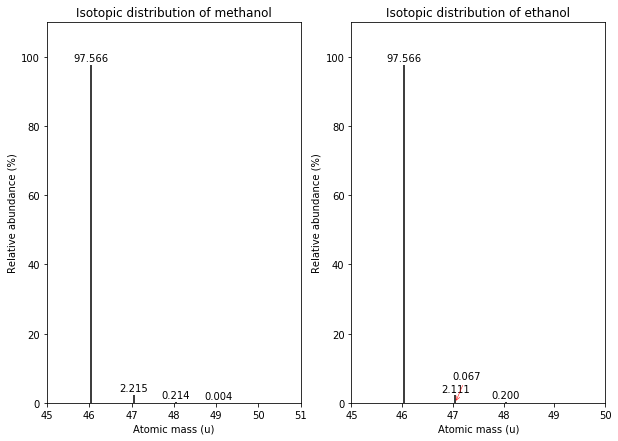

In [35]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.title("Isotopic distribution of methanol")
plotDistribution(methanol_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.subplot(1,2,2)
plt.title("Isotopic distribution of ethanol")
plotDistribution(ethanol_isoDist)
plt.xlabel("Atomic mass (u)")
plt.ylabel("Relative abundance (%)")

plt.savefig("methanol_ethanol_isoDistribution.png")

In [36]:
methanol = EmpiricalFormula("CH3OH")
ethanol = EmpiricalFormula("CH2") + methanol

print("Fine Isotope Distribution:")
isotopes = ethanol.getIsotopeDistribution( FineIsotopePatternGenerator(1e-6) )
prob_sum = sum([iso.getIntensity() for iso in isotopes.getContainer()])
print("This covers", prob_sum, "probability")
for iso in isotopes.getContainer():
    print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")

Fine Isotope Distribution:
This covers 0.9999993089130612 probability
Isotope 46.0418651914 has abundance 97.5662887096405 %
Isotope 47.0452201914 has abundance 2.110501006245613 %
Isotope 47.046082191400004 has abundance 0.03716550418175757 %
Isotope 47.0481419395 has abundance 0.06732848123647273 %
Isotope 48.046119191399995 has abundance 0.20049810409545898 %
Isotope 48.0485751914 has abundance 0.011413302854634821 %
Isotope 48.0494371914 has abundance 0.0008039440217544325 %
Isotope 48.0514969395 has abundance 0.0014564131561201066 %
Isotope 49.049474191399995 has abundance 0.004337066275184043 %
Isotope 49.0523959395 has abundance 0.00013835959862262825 %


In [37]:
isotopes = ethanol.getIsotopeDistribution( CoarseIsotopePatternGenerator(5, True) )
for iso in isotopes.getContainer():
    print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")

Isotope 46.0 has abundance 97.56627082824707 %
Isotope 47.0 has abundance 2.21499465405941 %
Isotope 48.0 has abundance 0.21421676501631737 %
Isotope 49.0 has abundance 0.00448863283963874 %
Isotope 50.0 has abundance 2.6492455162951956e-05 %


In [38]:
lys = ResidueDB().getResidue("Lysine")
print(lys.getName())
print(lys.getThreeLetterCode())
print(lys.getOneLetterCode())
print(lys.getAverageWeight())
print(lys.getMonoWeight())
print(lys.getPka())
print(lys.getFormula().toString())

Lysine
Lys
K
146.18788276708443
146.1055284466
2.16
C6H14N2O2


In [39]:
ox = ModificationsDB().getModification("Oxidation")
print(ox.getUniModAccession())
print(ox.getUniModRecordId())
print(ox.getDiffMonoMass())
print(ox.getId())
print(ox.getFullId())
print(ox.getFullName())
print(ox.getDiffFormula())

UniMod:35
35
15.994915
Oxidation
Oxidation (D)
Oxidation or Hydroxylation
O1


In [40]:
isotopes = ox.getDiffFormula().getIsotopeDistribution(CoarseIsotopePatternGenerator(5))
for iso in isotopes.getContainer():
    print (iso.getMZ(), ":", iso.getIntensity())

15.994915 : 0.9975699782371521
16.998269837800002 : 0.0003800000122282654
18.0016246756 : 0.002050000010058284


In [41]:
uridine = RibonucleotideDB().getRibonucleotide(b"U")
print(uridine.getName())
print(uridine.getCode())
print(uridine.getAvgMass())
print(uridine.getMonoMass())
print(uridine.getFormula().toString())
print(uridine.isModified())
methyladenosine = RibonucleotideDB().getRibonucleotide(b"m1A")
print(methyladenosine.getName())
print(methyladenosine.isModified())

uridine
U
244.2043
244.0695
C9H12N2O6
False
1-methyladenosine
True
